In [724]:
from importlib import reload
import numpy as np
from numpy import transpose, trace, multiply, power, dot
from numpy.linalg import multi_dot, matrix_power, norm
import scipy.stats as ss
from scipy.special import comb
import math
import pandas as pd
import time
from tqdm import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pickle
import data_gen as dg
import stat_test as st
import visualizations as viz

In [808]:
# Reload modules in case of modifications
reload(dg)
reload(st)
reload(viz)

<module 'visualizations' from '/Users/louis.cammarata/Dropbox (MIT)/SBMtesting/Simulations-Python/visualizations.py'>

# Case 1: Powerless Chi2, Powerful SQ

In [726]:
# Test parameters
N_rep = 500
level = 0.05

In [727]:
# Data generation parameters
n = 300
K = 5
exact = True

In [728]:
# Initialize error dataframes
range_a = np.arange(0.2,0.6,0.1)
range_b = np.arange(0.05,0.09,0.01)
power_degree = np.zeros((len(range_a),len(range_b)))
power_SQ = np.zeros((len(range_a),len(range_b)))
power_PET = np.zeros((len(range_a),len(range_b)))

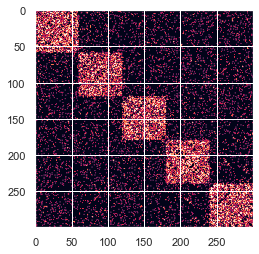

In [295]:
# Heatmap of the last A matrix (safety check)
plt.imshow(A)

In [729]:
# Read pickles
power_degree_df = pickle.load(open('exp2_case1_power_degree_df.pkl', 'rb'))
power_SQ_df = pickle.load(open('exp2_case1_power_SQ_df.pkl', 'rb'))
power_PET_df = pickle.load(open('exp2_case1_power_PET_df.pkl', 'rb'))

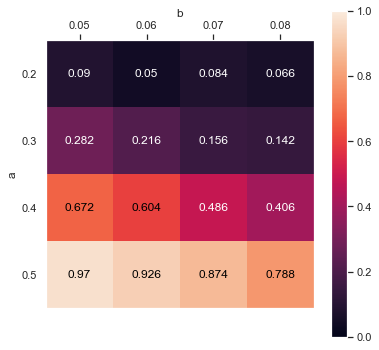

In [731]:
viz.heatmap_with_values(power_degree_df, save_to='exp2_case1_power_degree_df.png')

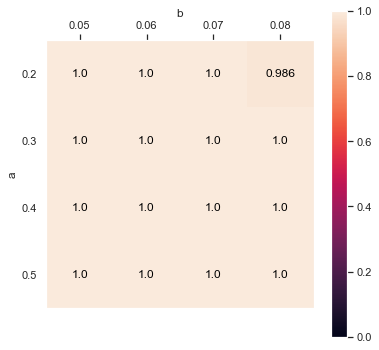

In [732]:
viz.heatmap_with_values(power_SQ_df, save_to='exp2_case1_power_SQ_df.png')

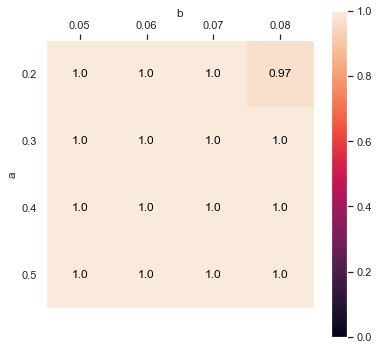

In [733]:
viz.heatmap_with_values(power_PET_df, save_to='exp2_case1_power_PET_df.png')

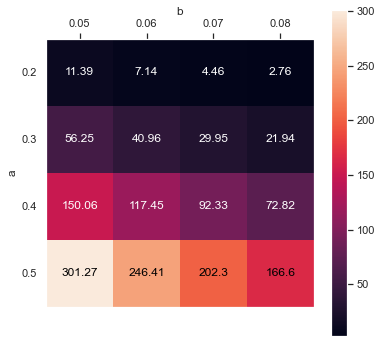

In [735]:
# Plot value of the phase transition parameter
rho_mat = np.zeros((len(range_a),len(range_b)))
for i in range(len(range_a)):
    for j in range(len(range_b)):
        a = range_a[i]
        b = range_b[j]
        rho_mat[i,j] = (n*(a-b)**2/(K*a+K*(K-1)*b))**2
# Cast rho_mat as dataframe
rho_df = pd.DataFrame(np.round(rho_mat,2), np.round(range_a,2), np.round(range_b,2))
# Plot heatmap of rho_df
viz.heatmap_with_values(rho_df, cmap_scale=False, save_to='exp2_case1_rho_df.png')

# Case 2: Powerful Chi2, Powerless SQ

In [816]:
# Test parameters
N_rep = 500
level = 0.05

In [817]:
# Data generation parameters
b = 1
K = 2
exact = True

In [818]:
# Initialize error dataframes
range_n = np.array([200, 300, 400, 500])
range_c = np.array([0.2,0.3,0.4,0.5])
power_degree = np.zeros((len(range_n),len(range_c)))
power_SQ = np.zeros((len(range_n),len(range_c)))
power_PET = np.zeros((len(range_n),len(range_c)))

In [819]:
# Run simulations
np.random.seed(seed=13)
for k in tqdm(range(N_rep)):
    time.sleep(0.01)
    for i in range(len(range_n)):
        n = range_n[i]
        for j in range(len(range_c)):
            c = range_c[j] 
            a = b+1/n**0.25
            eta = np.concatenate((np.repeat(a,int(K/2)),np.repeat(b,int(K/2)))).reshape((K,1))
            eta = eta/norm(eta)
            A = dg.sample_alt_adj_matrix_rank1(n, K, eta, c, exact)
            power_degree[i,j] += st.degree_test(A, level)['reject']
            power_SQ[i,j] += st.SQ_test(A, level)['reject']
            power_PET[i,j] += st.PET_test(A, level)['reject']
power_degree = power_degree/N_rep
power_SQ = power_SQ/N_rep
power_PET = power_PET/N_rep

100%|██████████| 500/500 [06:48<00:00,  1.22it/s]


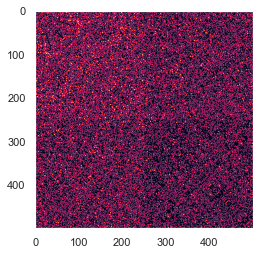

In [820]:
# Heatmap of the last A matrix (safety check)
plt.imshow(A)

In [821]:
# Construct power dataframes
power_degree_df = pd.DataFrame(power_degree, np.round(range_n,2), np.round(range_c,2))
power_SQ_df = pd.DataFrame(power_SQ, np.round(range_n,2), np.round(range_c,2))
power_PET_df = pd.DataFrame(power_PET, np.round(range_n,2), np.round(range_c,2))

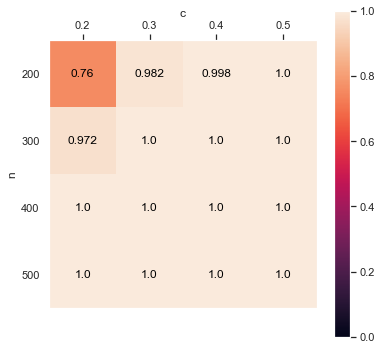

In [822]:
viz.heatmap_with_values(power_degree_df, xlabel='c', ylabel='n', save_to='exp2_case2_power_degree_df.png')

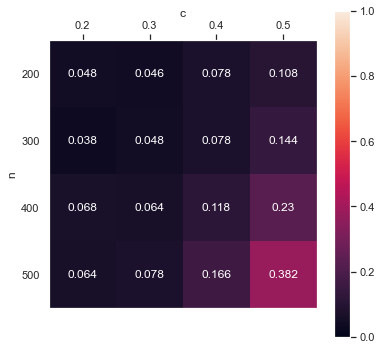

In [823]:
viz.heatmap_with_values(power_SQ_df, xlabel='c', ylabel='n', save_to='exp2_case2_power_SQ_df.png')

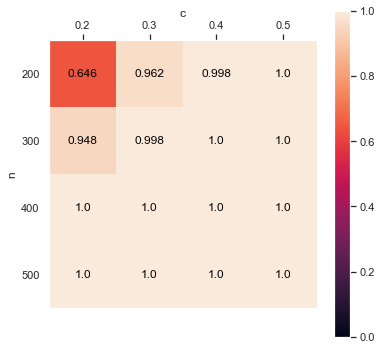

In [824]:
viz.heatmap_with_values(power_PET_df, xlabel='c', ylabel='n', save_to='exp2_case2_power_PET_df.png')

In [825]:
# Plot value of the phase transition parameter
rho_mat_degree = np.zeros((len(range_n),len(range_c)))
rho_mat_SQ = np.zeros((len(range_n),len(range_c)))
for i in range(len(range_n)):
    n = range_n[i]
    for j in range(len(range_c)):
        c = range_c[j] 
        a = b+1/n**0.25# Cast rho_mat as dataframe
        rho_mat_degree[i,j] = c*(n**1.5)/4/K**2*(a-b)**2/(a+b)**2*(a-b+(5*a**2+6*a*b+5*b**2)**0.5)**2
        rho_mat_SQ[i,j] = (c**2)*(n**2)/16/K**4*(a-b)**4/(a+b)**4*(a-b+(5*a**2+6*a*b+5*b**2)**0.5)**4
rho_degree_df = pd.DataFrame(np.round(rho_mat_degree,2), np.round(range_n,2), np.round(range_c,2))
rho_SQ_df = pd.DataFrame(np.round(rho_mat_SQ,2), np.round(range_n,2), np.round(range_c,2))
maxval_rho = max(rho_degree_df.max().max(),rho_SQ_df.max().max())

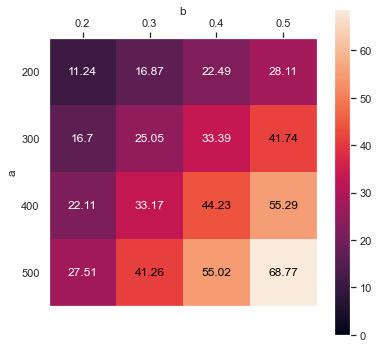

In [826]:
# Plot heatmap of rho_degree_df
viz.heatmap_with_values(rho_degree_df, cmap_scale=False, cmap_min=0, cmap_max=maxval_rho, save_to='exp2_case2_rho_degree_df.png')

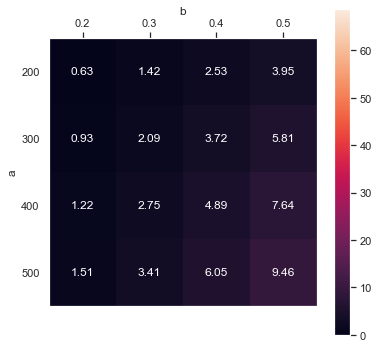

In [827]:
# Plot heatmap of rho_SQ_df
viz.heatmap_with_values(rho_SQ_df, cmap_scale=False, cmap_min=0, cmap_max=maxval_rho, save_to='exp2_case2_rho_SQ_df.png')